In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


In [2]:
# Define paths to your datasets
data_paths = {
    'Bearing Fault': r'E:\Cutting Tool Paper\Dataset\cutting tool data\new_data\STFT\Bearing Fault Data',
    'Gear Fault': r'E:\Cutting Tool Paper\Dataset\cutting tool data\new_data\STFT\Gear Fault Data',
    'Tool Fault': r'E:\Cutting Tool Paper\Dataset\cutting tool data\new_data\STFT\Tool Fault Data',
    'Normal': r'E:\Cutting Tool Paper\Dataset\cutting tool data\new_data\STFT\Normal Data'
}

# Parameters
batch_size = 32
img_height = 224
img_width = 224
epochs = 20


In [3]:
# Create an ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    r'E:\Cutting Tool Paper\Dataset\cutting tool data\new_data\STFT',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    r'E:\Cutting Tool Paper\Dataset\cutting tool data\new_data\STFT',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 128 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Muhammad Umar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Verify the training data generator
train_images, train_labels = next(train_generator)
print(f'Training batch shape: {train_images.shape}, {train_labels.shape}')

# Verify the validation data generator
val_images, val_labels = next(validation_generator)
print(f'Validation batch shape: {val_images.shape}, {val_labels.shape}')


Training batch shape: (32, 224, 224, 3), (32, 4)
Validation batch shape: (32, 224, 224, 3), (32, 4)


In [6]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(r'E:\Cutting Tool Paper\Implementation\models\best_model.h5.keras', monitor='val_loss', save_best_only=True)
]


In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_generator.samples // batch_size) + 1,
    validation_data=validation_generator,
    validation_steps=(validation_generator.samples // batch_size) + 1,
    epochs=epochs,
    callbacks=callbacks
)


Epoch 1/20


C:\Users\Muhammad Umar\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.1842 - loss: 4.6302

e:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 835ms/step - accuracy: 0.1896 - loss: 4.6081 - val_accuracy: 0.5000 - val_loss: 1.3597
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 468ms/step - accuracy: 0.2594 - loss: 1.3754 - val_accuracy: 0.2500 - val_loss: 1.4896
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 681ms/step - accuracy: 0.3271 - loss: 1.3386 - val_accuracy: 0.5000 - val_loss: 1.1194
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 691ms/step - accuracy: 0.4938 - loss: 1.1074 - val_accuracy: 0.5000 - val_loss: 0.9375
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 710ms/step - accuracy: 0.4885 - loss: 0.9623 - val_accuracy: 0.5000 - val_loss: 0.8728
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 705ms/step - accuracy: 0.5750 - loss: 0.9107 - val_accuracy: 0.5000 - val_loss: 0.8409
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 481ms/step - accuracy: 0.5271 - loss: 0.9936 - val_accuracy: 0.5000 - val_loss: 0.8416
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 685ms/step - accuracy: 0.6187 - loss: 0.8791 - val_accuracy: 0.7500 - val_loss: 0.7210
Epo

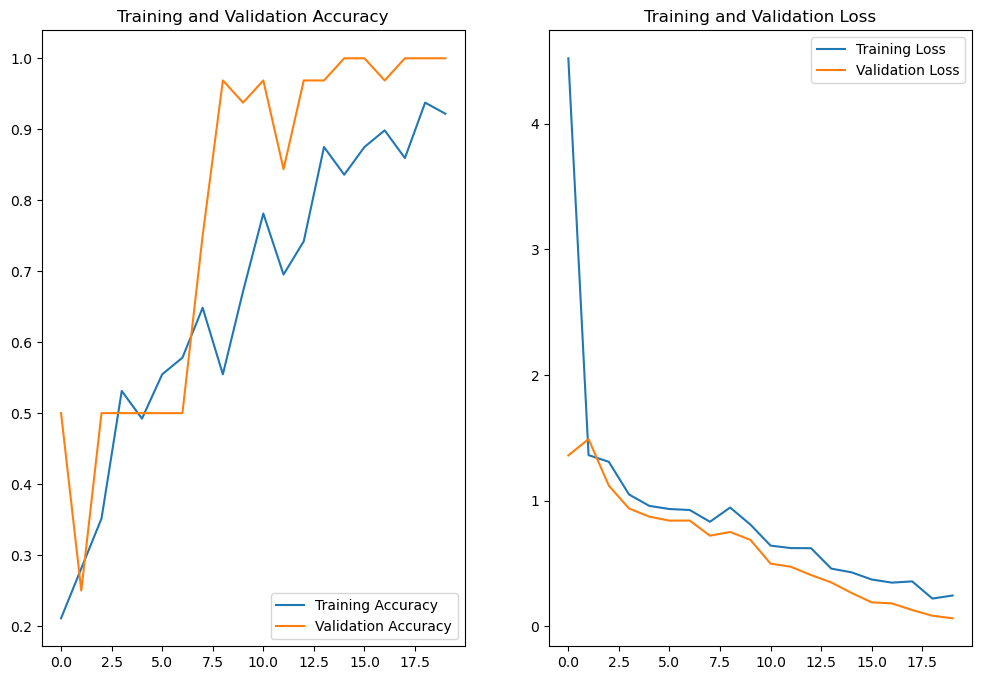

In [8]:
def plot_training_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_curves(history)
